In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import glob

In [3]:
glob.glob("C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr/*csv")

['C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\AAL_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\AAPL_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\AAP_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ABBV_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ABC_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ABT_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ACN_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ADBE_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ADI_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ADM_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ADP_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\ADSK_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5y

In [4]:
len(glob.glob("C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr/*csv"))

505

In [5]:
company_list = [
    'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\AAPL_data.csv',
    'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\AMZN_data.csv',
    'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\GOOG_data.csv',
    'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\MSFT_data.csv'
 ]

In [6]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
all_data = pd.DataFrame()

for file in company_list:
    current_file = pd.read_csv(file)
    all_data = pd.concat([all_data,current_file],ignore_index = True)

In [8]:
all_data.shape

(4752, 7)

In [9]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [10]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [11]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [12]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

2.Change in the price of stock overtime

In [13]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [14]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [15]:
tech_list = all_data['Name'].unique()

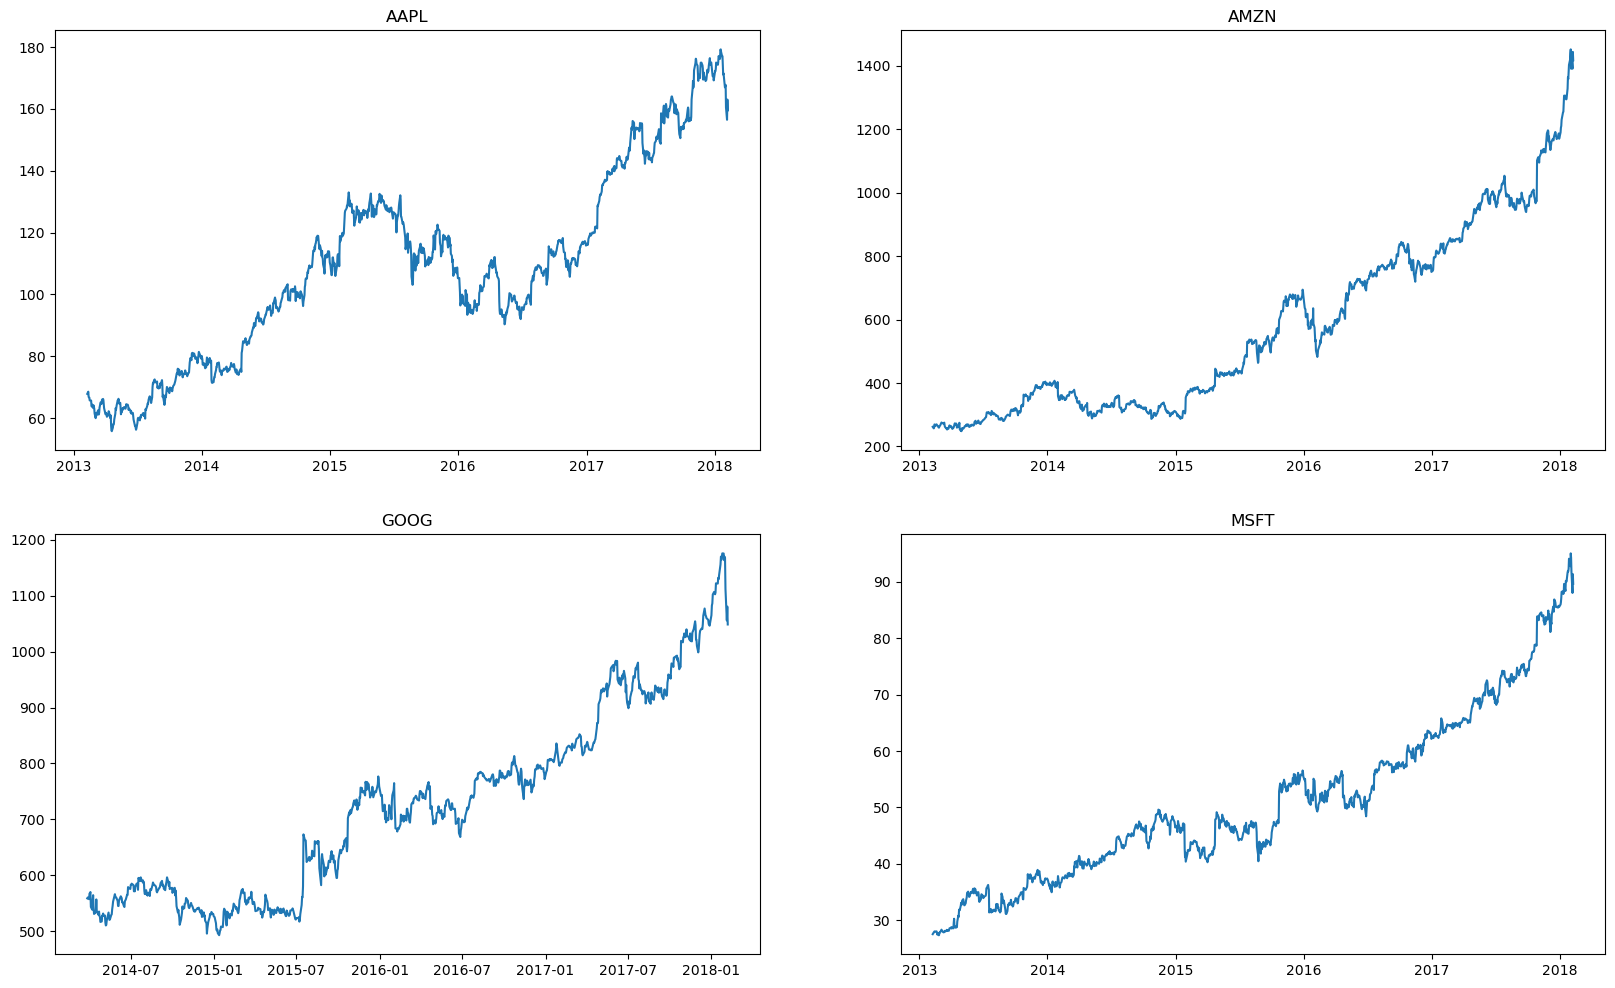

In [16]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index) ## creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) ## plotting "date" vs "close"
    plt.title(company)

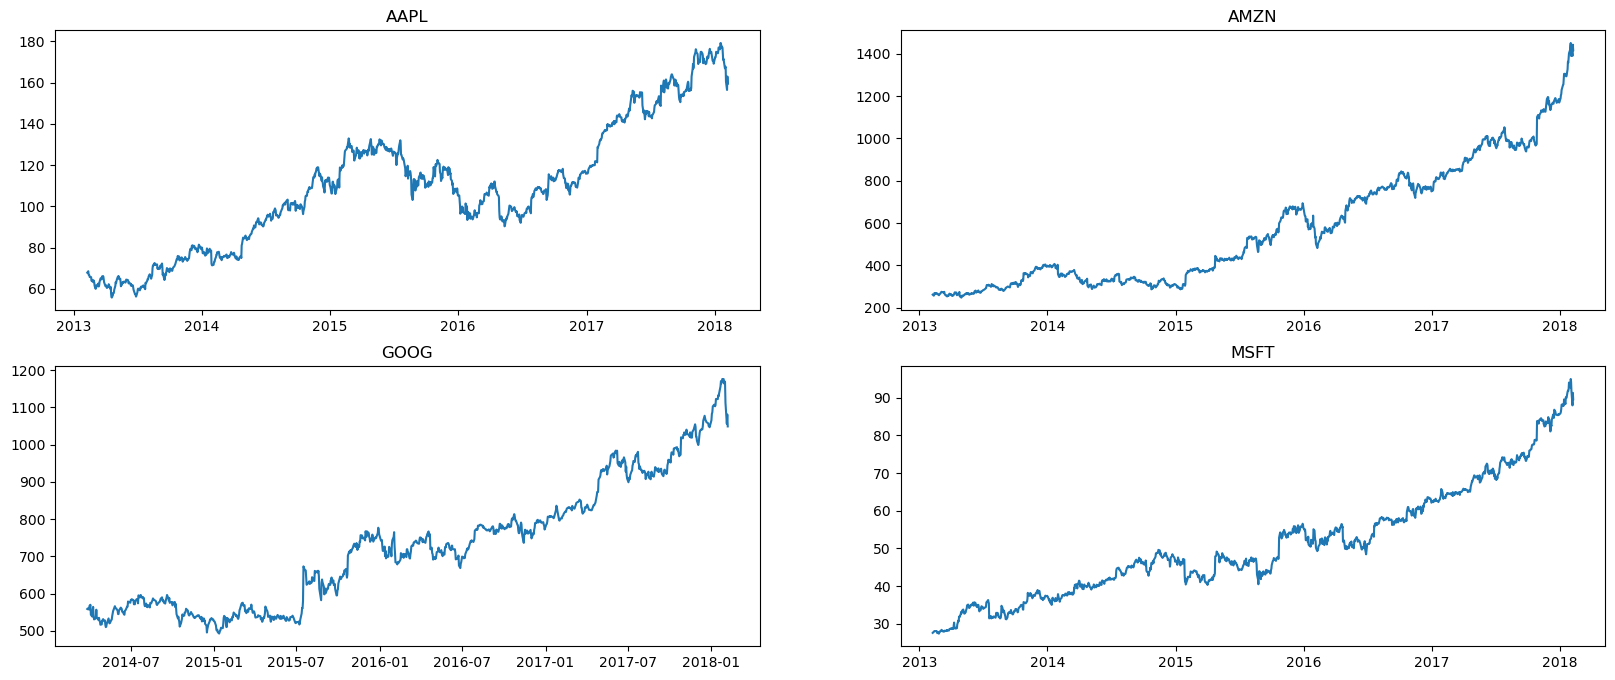

In [17]:
plt.figure(figsize=(20,8))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

3.Analyzing Moving Average for various Stocks

In [18]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [21]:
all_data['close'].rolling(window=10).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
4747    92.765
4748    92.943
4749    92.582
4750    92.525
4751    92.304
Name: close, Length: 4752, dtype: float64

In [22]:
new_data = all_data.copy()

In [32]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [33]:
new_data.tail(10)

,date,open,high,low,close,volume,Name,close_10,close_20,close_30,close_50
4742,2018-01-25,92.465,93.240,91.9300,92.33,26383238,MSFT,90.393,88.6410,87.647667,85.9292
4743,2018-01-26,93.120,94.060,92.5800,94.06,29172167,MSFT,90.991,89.0585,87.930333,86.1318
4744,2018-01-29,95.140,95.450,93.7200,93.92,31569940,MSFT,91.423,89.4685,88.216000,86.3292
4745,2018-01-30,93.300,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,88.484333,86.5244
4746,2018-01-31,93.750,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,88.756333,86.7606
4747,2018-02-01,94.790,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,89.019000,86.9978
4748,2018-02-02,93.640,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,89.217333,87.1828
4749,2018-02-05,90.560,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,89.300000,87.2684
4750,2018-02-06,86.890,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,89.494333,87.4328
4751,2018-02-07,90.490,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,89.631000,87.5598


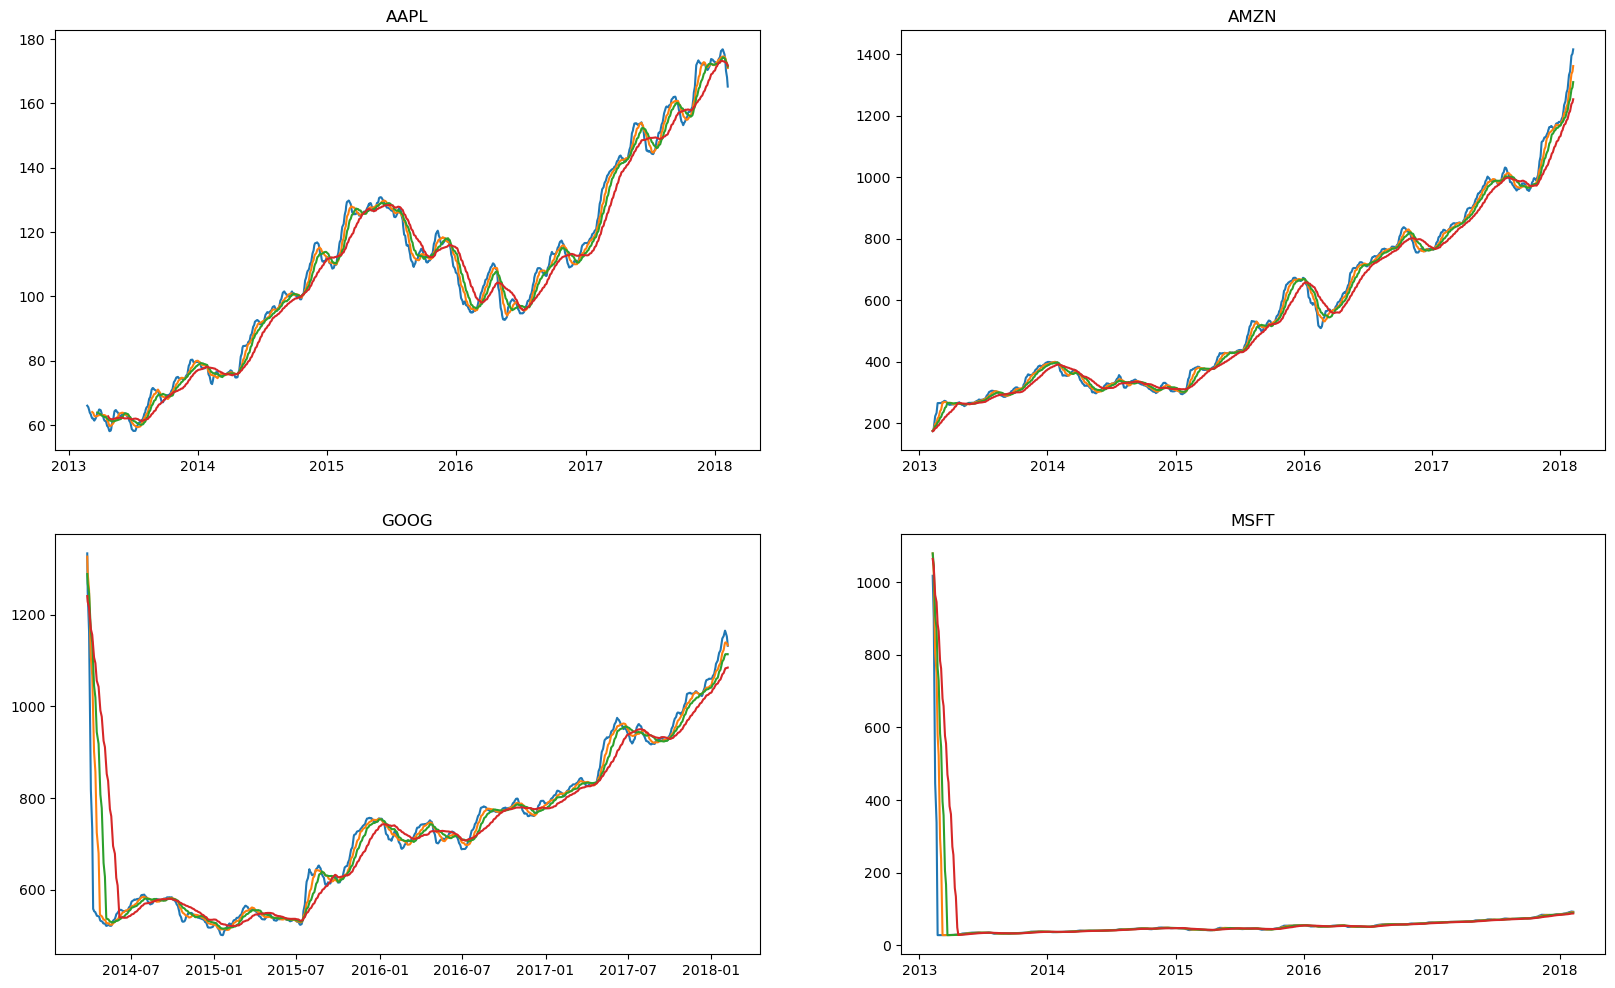

In [36]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter2 = new_data['Name']==company
    df2 = new_data[filter2]
    plt.plot(df2['date'],df2['close_10']) 
    plt.plot(df2['date'],df2['close_20'])
    plt.plot(df2['date'],df2['close_30'])
    plt.plot(df2['date'],df2['close_50'])
    plt.title(company)

In [37]:
new_data.set_index('date',inplace=True)

In [38]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_30,close_50
date,,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,89.019000,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,89.217333,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,89.300000,87.2684


In [39]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_30', 'close_50'],
      dtype='object')

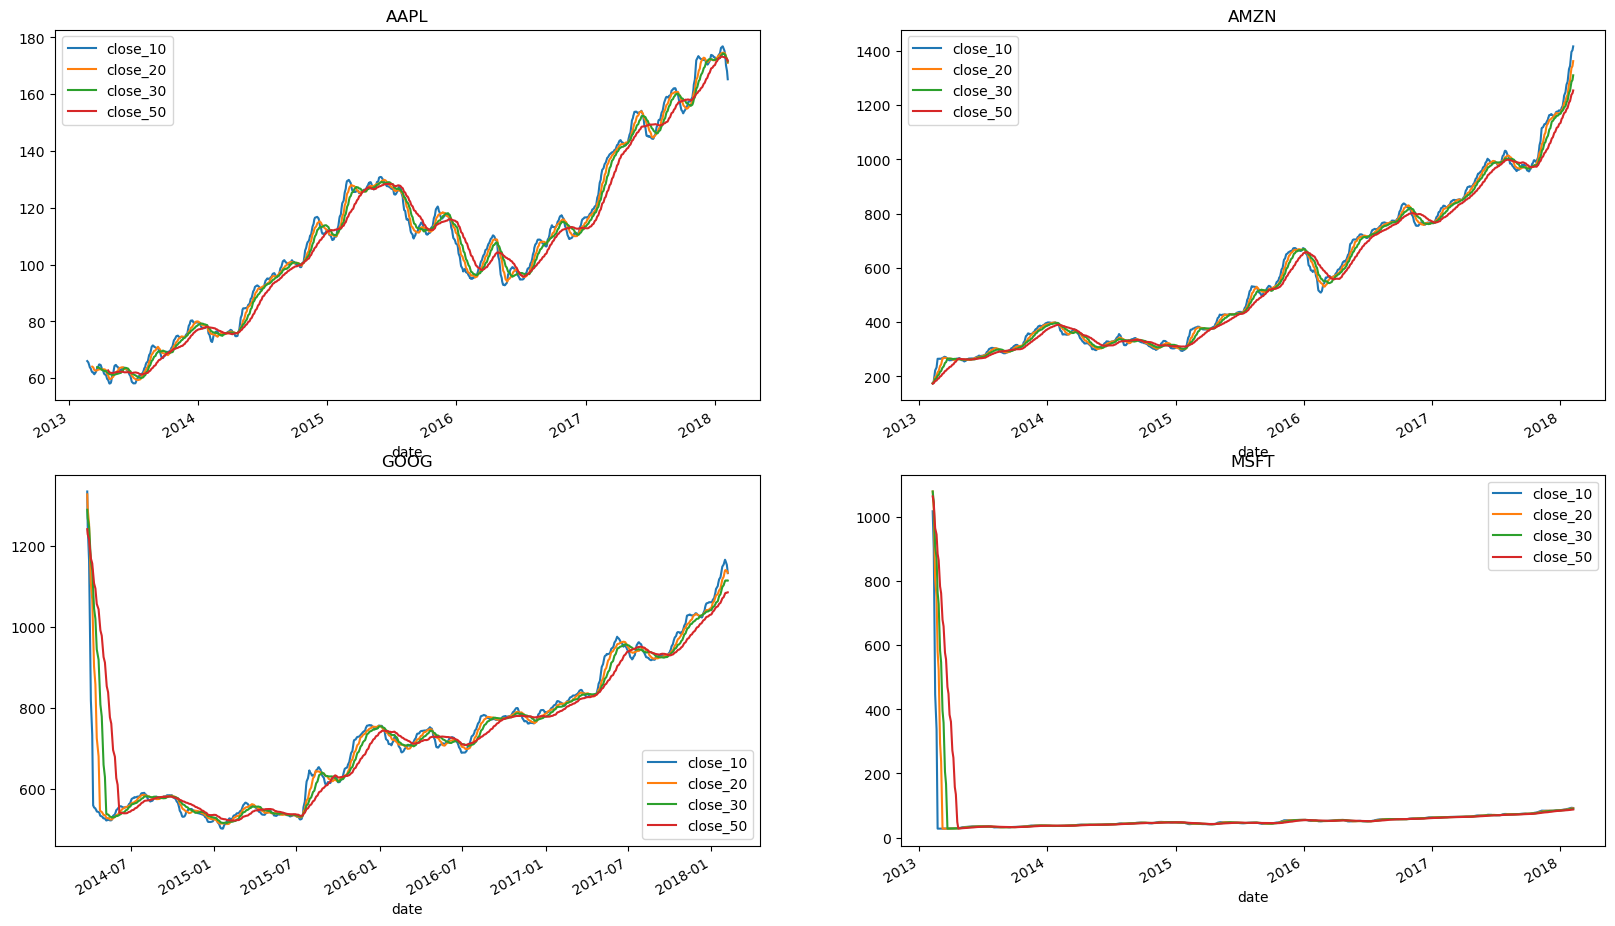

In [42]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter3 = new_data['Name']==company
    df3 = new_data[filter3]
    df3[['close_10','close_20','close_30','close_50']].plot(ax=plt.gca())
    plt.title(company)

4.Observing closing price change in Apple stocks

In [43]:
apple = pd.read_csv('C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\AAPL_data.csv')

In [44]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [45]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [47]:
apple['close'].pct_change() * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [48]:
apple['Daily return (in%)'] = apple['close'].pct_change() *100

In [49]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily return (in%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [51]:
import plotly.express as px

In [53]:
px.line(apple,x='date',y='Daily return (in%)')

5.Performing resampling analysis of closing price

In [54]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return (in%)    float64
dtype: object

In [55]:
apple['date'] = pd.to_datetime(apple['date'])

In [56]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return (in%)           float64
dtype: object

In [57]:
apple.set_index('date',inplace=True)

In [58]:
apple.head(5)

,open,high,low,close,volume,Name,Daily return (in%)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


<Axes: xlabel='date'>

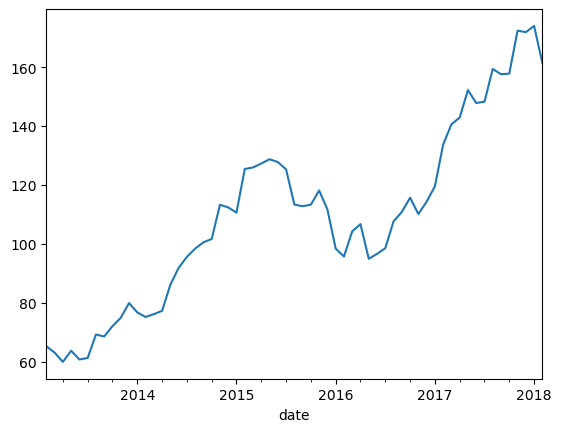

In [61]:
apple['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

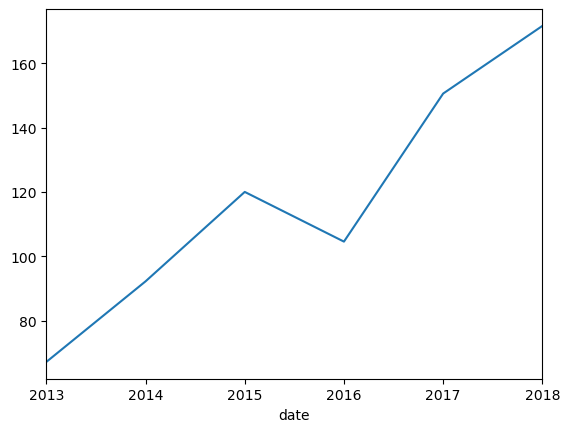

In [62]:
apple['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

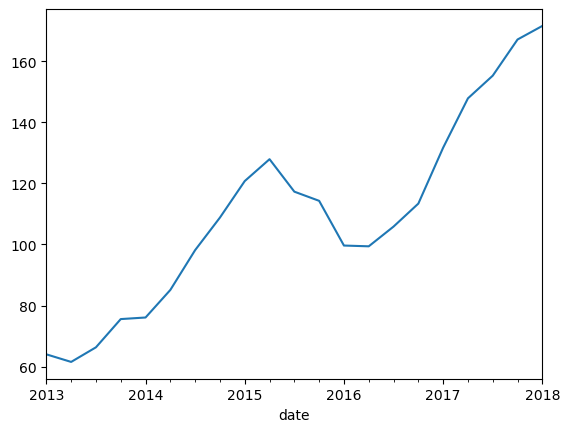

In [63]:
apple['close'].resample('Q').mean().plot()

Are the closing prices correlated or not

In [64]:
company_list

['C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\AAPL_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\AMZN_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\GOOG_data.csv',
 'C:/Users/ASUS/Downloads/S&P_resources/individual_stocks_5yr\\MSFT_data.csv']

In [65]:
apple = pd.read_csv(company_list[0])
amazon = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
microsoft = pd.read_csv(company_list[3])


In [66]:
closing_price = pd.DataFrame()

In [68]:
closing_price['apple_close'] =  apple['close']
closing_price['amazon_close'] =  amazon['close']
closing_price['google_close'] =  google['close']
closing_price['micro_close'] =  microsoft['close']

In [69]:
closing_price

,apple_close,amazon_close,google_close,micro_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


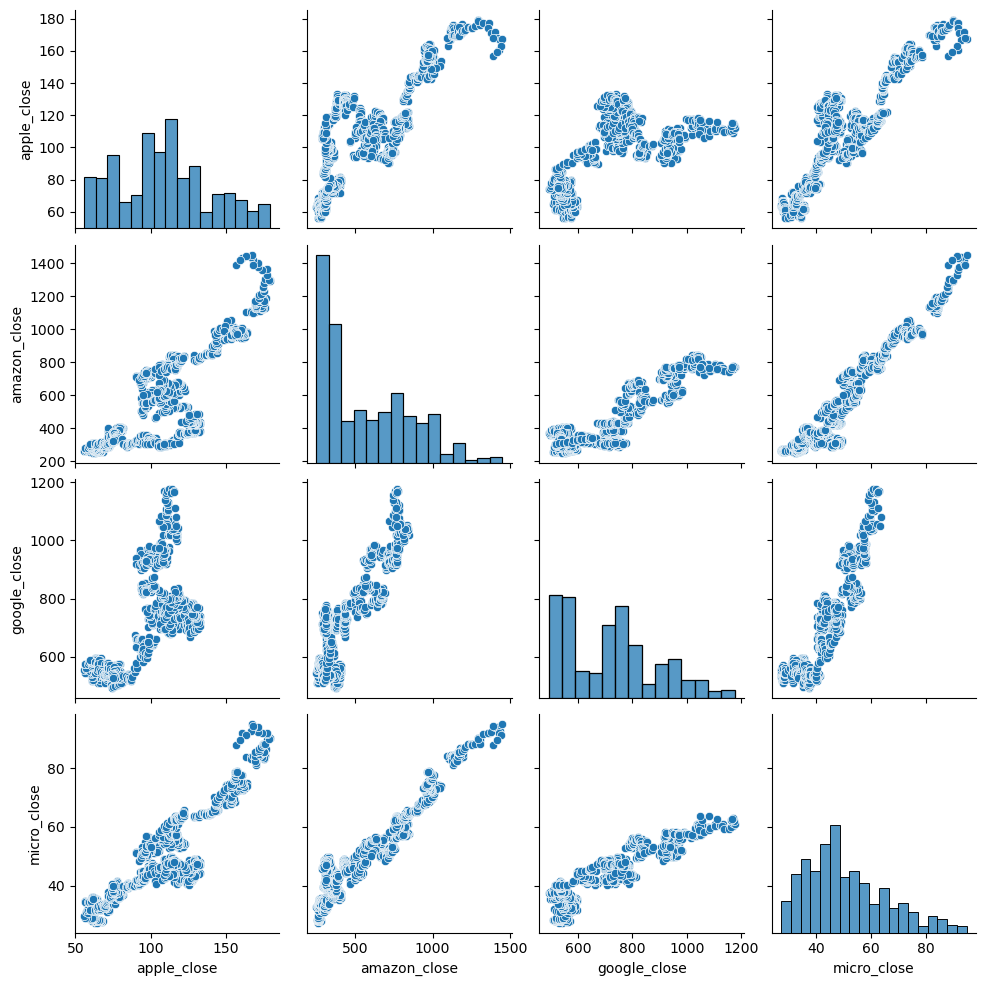

In [70]:
sns.pairplot(closing_price)

In [71]:
closing_price.corr()

,apple_close,amazon_close,google_close,micro_close
apple_close,1.000000,0.819078,0.640522,0.899689
amazon_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
micro_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

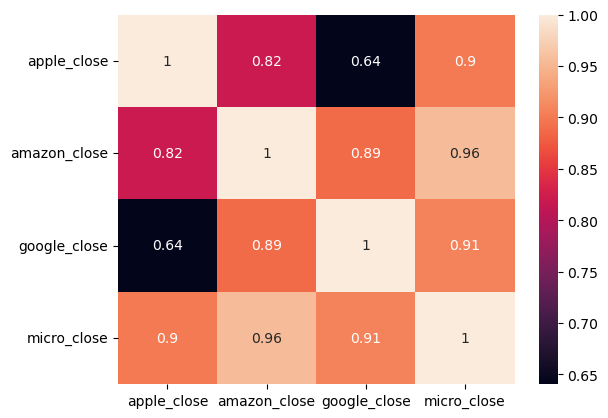

In [73]:
sns.heatmap(closing_price.corr(),annot=True)

In [74]:
closing_percent = pd.DataFrame()

In [77]:
closing_percent['close_apple'] = apple['close'].pct_change() * 100
closing_percent['close_amazon'] = amazon['close'].pct_change() * 100
closing_percent['close_microsoft'] = microsoft['close'].pct_change() * 100
closing_percent['close_google'] = google['close'].pct_change() * 100

In [78]:
closing_percent

,close_apple,close_amazon,close_microsoft,close_google
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,1.125227,0.273968
2,-2.506658,0.579293,0.071788,-0.539295
3,-0.190297,4.163123,0.538020,1.829542
4,-0.089934,-0.085353,0.035676,-0.028211
...,...,...,...,...
1254,0.209043,-4.196734,-0.789391,NaN
1255,-4.339015,2.874101,-2.631021,NaN
1256,-2.498442,-2.793804,-4.118544,NaN
1257,4.179181,3.801439,3.784091,NaN


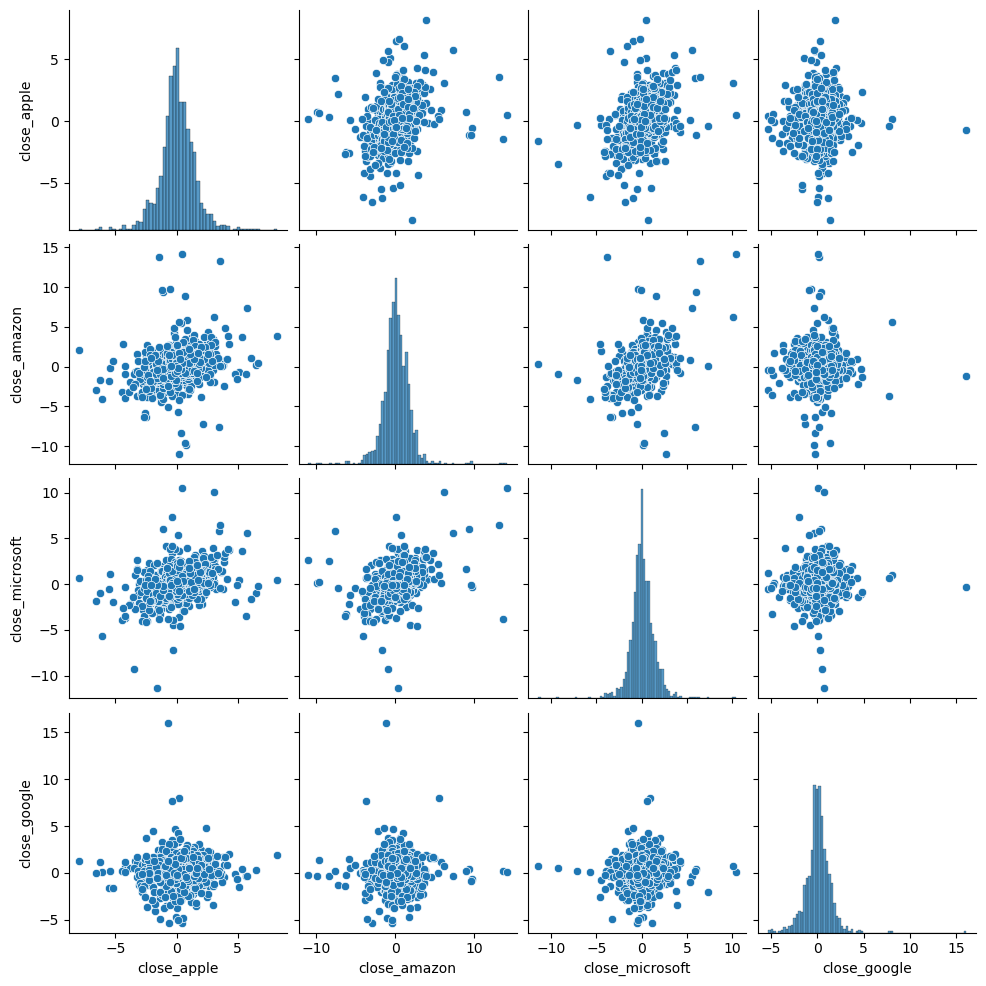

In [79]:
sns.pairplot(closing_percent)

In [80]:
closing_percent.corr()

,close_apple,close_amazon,close_microsoft,close_google
close_apple,1.000000,0.287659,0.366598,0.036202
close_amazon,0.287659,1.000000,0.402678,0.027698
close_microsoft,0.366598,0.402678,1.000000,0.038939
close_google,0.036202,0.027698,0.038939,1.000000


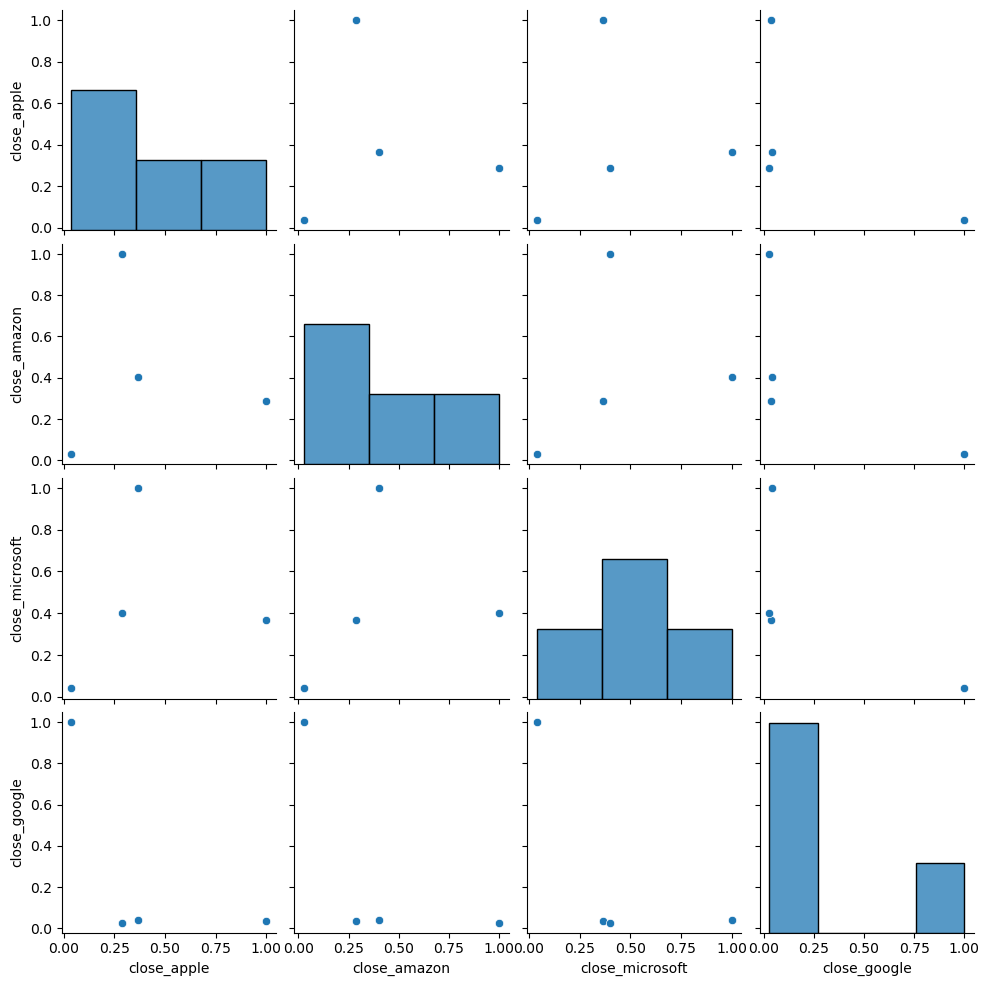

In [81]:
sns.pairplot(closing_percent.corr())

<Axes: >

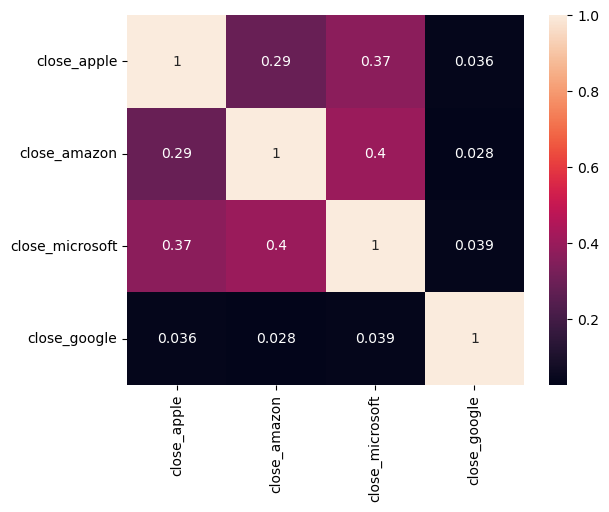

In [83]:
sns.heatmap(closing_percent.corr(),annot=True)

In [86]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'micro_close'], dtype='object')

In [97]:
for col in closing_price.columns:
    closing_price[col + 'per' ] = (closing_price[col] - closing_price[col].shift(1))/(closing_price[col].shift(1))*100

In [98]:
closing_price

,apple_close,amazon_close,google_close,micro_close,col_perapple_close,col_peramazon_close,col_pergoogle_close,col_permicro_close,apple_closeper,amazon_closeper,...,col_pergoogle_closeper,col_permicro_closeper,apple_closeperper,amazon_closeperper,google_closeperper,micro_closeperper,col_perapple_closeperper,col_peramazon_closeperper,col_pergoogle_closeperper,col_permicro_closeperper
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,-31.4386,157.21,459.99,-72.14,1.042235,-1.809506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66.8428,258.70,556.97,27.88,-33.1572,158.70,456.97,-72.12,-2.506658,0.579293,...,-0.656536,-0.027724,-340.508048,-132.013892,-296.846326,-93.620175,NaN,NaN,NaN,NaN
3,66.7156,269.47,567.16,28.03,-33.2844,169.47,467.16,-71.97,-0.190297,4.163123,...,2.229906,-0.207987,-92.408330,618.655669,-439.246761,649.461980,-92.982254,616.032403,-439.647124,650.207987
4,66.6556,269.24,567.00,28.04,-33.3444,169.24,467.00,-71.96,-0.089934,-0.085353,...,-0.034250,-0.013895,-52.740255,-102.050209,-101.541956,-93.369009,-53.010453,-101.999845,-101.535917,-93.319439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,67.7800,1290.00,NaN,-5.74,0.209043,-4.196734,...,NaN,15.030060,-24.122086,-561.679318,NaN,-132.250257,-24.432100,-561.368653,NaN,-148.069708
1255,160.5000,1429.95,NaN,91.78,60.5000,1329.95,NaN,-8.22,-4.339015,2.874101,...,NaN,43.205575,-2175.660985,-168.484217,NaN,233.297687,-2169.259369,-168.707016,NaN,187.461092
1256,156.4900,1390.00,NaN,88.00,56.4900,1290.00,NaN,-12.00,-2.498442,-2.793804,...,NaN,45.985401,-42.419140,-197.206196,NaN,56.537899,-38.289483,-196.996128,NaN,6.433953
1257,163.0300,1442.84,NaN,91.33,63.0300,1342.84,NaN,-8.67,4.179181,3.801439,...,NaN,-27.750000,-267.271450,-236.066771,NaN,-191.879329,-274.669540,-236.361456,NaN,-160.345238


In [94]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'micro_close',
       'col_perapple_close', 'col_peramazon_close', 'col_pergoogle_close',
       'col_permicro_close', 'apple_closeper', 'amazon_closeper',
       'google_closeper', 'micro_closeper', 'col_perapple_closeper',
       'col_peramazon_closeper', 'col_pergoogle_closeper',
       'col_permicro_closeper'],
      dtype='object')

In [95]:
closing_p = closing_price[['apple_closeper', 'amazon_closeper',
       'google_closeper', 'micro_closeper']]

In [96]:
closing_p

,apple_closeper,amazon_closeper,google_closeper,micro_closeper
0,NaN,NaN,NaN,NaN
1,-31.4386,157.21,459.99,-72.14
2,-33.1572,158.70,456.97,-72.12
3,-33.2844,169.47,467.16,-71.97
4,-33.3444,169.24,467.00,-71.96
...,...,...,...,...
1254,67.7800,1290.00,NaN,-5.74
1255,60.5000,1329.95,NaN,-8.22
1256,56.4900,1290.00,NaN,-12.00
1257,63.0300,1342.84,NaN,-8.67


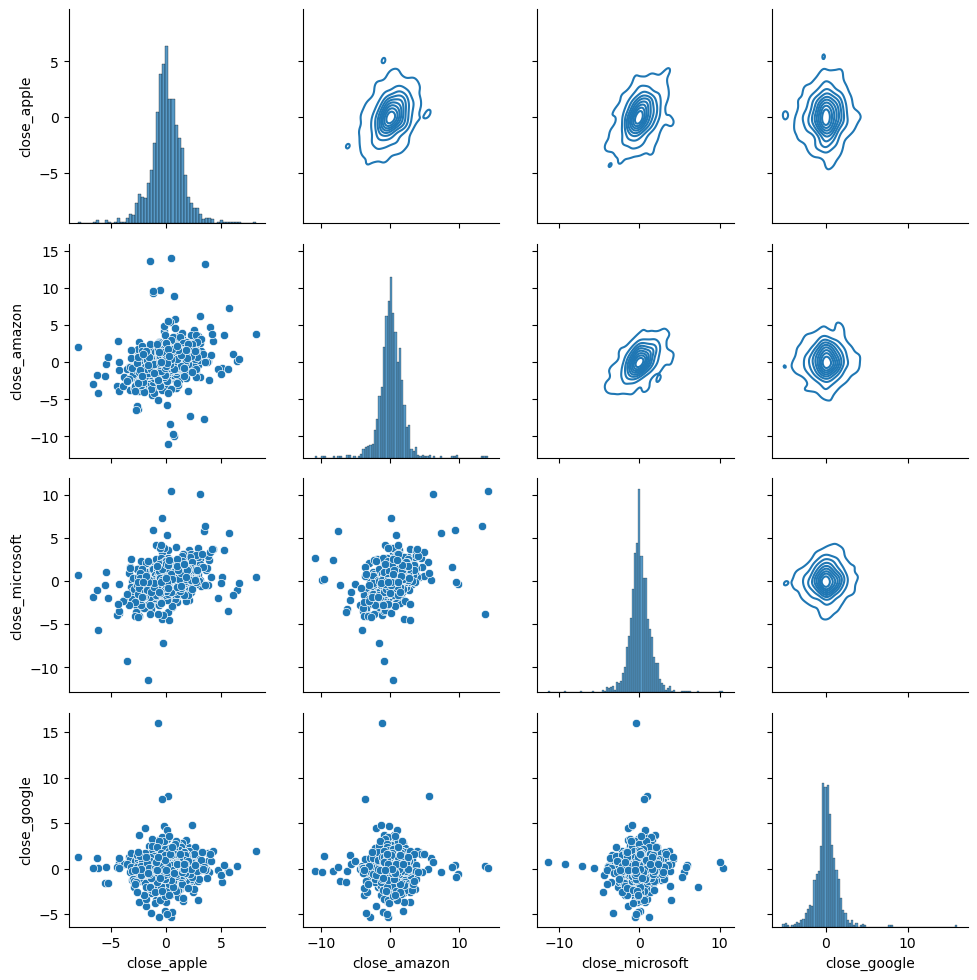

In [99]:
g=sns.PairGrid(data = closing_percent)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

Dashboarding